# Problem Statement:
He actually did it! Long time friend Ben Seller sold off his dad's old real estate company and invested it ALL into bitcoin! Lucky for him he bought at just the right time and bitcoin skyrocketed! He's a millionaire! Ben has come to me asking for help, again. He has been receiving a massive outpouring of financial advice from his friends and family, and he needs a quick way to decide what is actual financial advice and what is not.

By pulling data from the popular website Reddit, specifically the subreddits r/personalfinance and r/frugal, I will construct a model that will determine if the advice Ben is being given is “sound” financial advice, or just general advice about ways to save money.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.dummy import DummyClassifier

Load in the two selected models from the model notebook: random forest and XGBoost. Pull back in the data frame to get testing numbers using a train, test, split.

In [2]:
random_forest =joblib.load('./models/RandomForestpipe3.pkl')

In [3]:
boost = joblib.load('./models/boost.pkl')

In [4]:
df = pd.read_csv('./data/modeling_data.csv')

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

selftext     0
subreddit    0
target       0
dtype: int64

I went and asked several of my friends what advice they would give me, if I became a millionaire overnight. I then tested my best model on their responses, to see if it could parse out any real financial advice from the rest of the advice! This is creating a data base of friend answers to predict on.

In [7]:
friends = {'Rafa':'I recommend you invest in cryptocurrency. To the moon', 
           'Wil': 'Returns on the FBSOX, ROGSX, PRGTX, or the SHGTX mutual funds are all doing really well. I would recommend you invest in those. Or just go with Vanguard, cant go wrong with Vanguard',
           'Aaron': 'Invest in rental property.',
           'Wil2' : 'Stop eating out and stop going to bars.',
           'Aaron2' : 'Dont buy a brand new car right away.',
           'Wil3': 'Take 1% of your winnings and blow it on a vacation, gambling, or another frivolous purchase. Get that bug to unnecessarily spend money out of your system so you can be serious with the rest of it.',    
           'Jen': 'Save $1000 for an emergency fund. Pay off all debt. Set aside 3-6 months of spending for a fully funded emergency fund. Invest 15% of your household income in your retirement. Save for your childrens college fund. Pay off your mortgage. Build wealth and give all your remaining money to the church of Jesus Christ of latter-Day Saints.',
           'Jon' : 'Put all you rmoney in Target gift cards then send them care of Good Investements Inc. to PO Box 123 in Lyons Colorado.',
           'Colin' : 'The first step to winning the lottery is simple, take the lump sum winnings and then convert all of those winning into solid gold coins. Then build a large pool and swim through the coins, all cartoons have told me that this is the peak of wealth.',
           'Colin2' : 'Buy a monkey, the laws dont apply to you now that youre rich. Park wherever you want but make sure its still free parking. Invest the majority of your money in high risk investments and put the rest into a locked safe under your bed.',
           'Roland' : 'Youre gonna want to immediately cut off all contact with any friends or family members who have ever mentioned money to you in the past, as this is now a huge red flag. Itd be best if you delete facebook and lawyer up ASAP.',
           'Linda' : 'dont let it go to your head, i think a million isnt as much as it once was anymore',
           'Jon2' : 'Need extra cash? Sell some of your bones. You dont need all of them. There are like 500 of them in there or something.',
           'Jon3' : 'Invest in a startup, frontload it, pump it up and agressively persue investors. Put all your money for products into advertising and generate interest. Then sell the company for a massive profit.',
           'Jen2' : 'First step is to call your financial advisor and ask him or her to move at least 15% of your funds to a traditional IRA (not a Roth IRA). Next step is to call your friend Jose from Colombia and he will set up an annuity with 20% returns with a monthly payment of $45K. You will need to transfer your funds into a high yield account based in the Cayman Islands.',
           'Summer' : 'spend less on candles',
           'S1' : 'Breaking a million in savings means you can easily be financially independent for life if you maintain even a mildly frugal lifestyle.  As long as your yearly income from investing that million (likely in index funds if you like to keep things simple) exceeds your yearly spending, congratulations.  You never have to work again.  The back of the napkin average return for index funds is 7%, so if you really feel the need to maximise your spending (not something Id advise, doesnt really make you happier) you should be able to safely spend up to about $70,000 a year if youve invested safely and you trust yourself not to panic if the market crashes.',
           'S2' : 'Dont spend more than your investments earn.'
}

In [8]:
friendsdf = pd.DataFrame.from_dict(friends, orient='index')

In [9]:
friendsdf

,0
Rafa,I recommend you invest in cryptocurrency. To t...
Wil,"Returns on the FBSOX, ROGSX, PRGTX, or the SHG..."
Aaron,Invest in rental property.
Wil2,Stop eating out and stop going to bars.
Aaron2,Dont buy a brand new car right away.
Wil3,Take 1% of your winnings and blow it on a vaca...
Jen,Save $1000 for an emergency fund. Pay off all ...
Jon,Put all you rmoney in Target gift cards then s...
Colin,The first step to winning the lottery is simpl...
Colin2,"Buy a monkey, the laws dont apply to you now t..."


In [10]:
friendsdf.columns = ['text']

In [11]:
X_friends = friendsdf['text']

Train Test Split in order to get scores:

In [12]:
X = df['selftext']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

# baseline model

In [13]:
y.value_counts(normalize=True)

1    0.511271
0    0.488729
Name: target, dtype: float64

A very naive model will predict with 51% accuracy that the advice you are being given is from personal finance. 

In [14]:
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X,y)
print(f'dummy score: {dc.score(X,y)}')
null_preds = dc.predict(X)

dummy score: 0.5112709057122081


In [15]:
confusion_matrix(y, null_preds)

array([[   0, 6049],
       [   0, 6328]], dtype=int64)

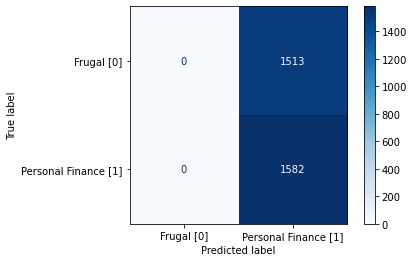

In [16]:
plot_confusion_matrix(dc, X_test, y_test, cmap='Blues',display_labels=['Frugal [0]', 'Personal Finance [1]']);    

This confusion matrix shows that the naive model will predict everything for the positive class and get around 51% correct. 

# random forest

In [17]:
random_forest.score(X_train,y_train), random_forest.score(X_test,y_test)

(0.9286791639732817, 0.8940226171243942)

Imported model still scores the same, which means our imports worked and we can continue on with analysis metrics.

In [18]:
forest_predicts = random_forest.predict(X_test)

In [19]:
confusion_matrix(y_test, forest_predicts)

array([[1367,  146],
       [ 182, 1400]], dtype=int64)

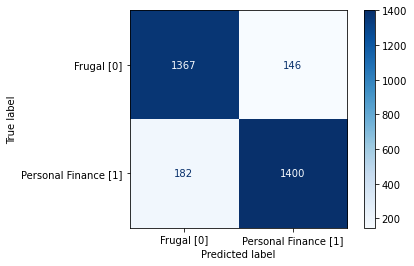

In [20]:
plot_confusion_matrix(random_forest, X_test, y_test, cmap='Blues',display_labels=['Frugal [0]', 'Personal Finance [1]']);    

This confusion matrix shows the predictions of the model on the test data. You can see that it gets most of its predictions correct, with an accuracy score of 0.89. It does tend to predict more false negatives than it does false positives. In the case of Mr. Seller pruning financial advice both types of failures are equally as non-important, It's more important to have a higher overall accuracy so he can quickly sort through all the advice. 

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, forest_predicts).ravel()

In [22]:
spec = tn/(tn + fp)
spec

0.9035029742233972

In [23]:
sens = tp / (tp + fn)
sens

0.8849557522123894

In [24]:
prec = tp / (tp+fp)
prec

0.9055627425614489

In [25]:
roc_auc_score(y_test, random_forest.predict_log_proba(X_test)[:,1])

0.9590922080276876

The metrics for this model are very strong on all accounts. It has relatively high sensitivity and specificity. Its ROC-AUC score is also very strong. This suggests that this is a very robust model that is doing a good job predicting what class the advice that Mr. Seller gets from his friends should be placed into. The weakness of this model come from the data it is trained on, reddit is probably not the best place to get financial advice, and that it is simply a bag of words analysis. Bad advice could slip through if it came with enough personal finance key words. 

The next section will be running the model on the answers that I received  from my friends, and evaluating what subreddit they should be classified in. 

In [26]:
friends_forest_preds = random_forest.predict(X_friends)

In [27]:
friends_forest_probs = random_forest.predict_log_proba(X_friends)

In [28]:
forest_friends = friendsdf.copy()

In [29]:
forest_friends['predictions'] = friends_forest_preds

In [30]:
forest_friends['predictions'] = forest_friends['predictions'].map(lambda x: 'Frugal' if x == 0 else "Personal Finance")

In [31]:
pd.set_option('display.max_colwidth',1000)
forest_friends

,text,predictions
Rafa,I recommend you invest in cryptocurrency. To the moon,Frugal
Wil,"Returns on the FBSOX, ROGSX, PRGTX, or the SHGTX mutual funds are all doing really well. I would recommend you invest in those. Or just go with Vanguard, cant go wrong with Vanguard",Personal Finance
Aaron,Invest in rental property.,Frugal
Wil2,Stop eating out and stop going to bars.,Frugal
Aaron2,Dont buy a brand new car right away.,Frugal
Wil3,"Take 1% of your winnings and blow it on a vacation, gambling, or another frivolous purchase. Get that bug to unnecessarily spend money out of your system so you can be serious with the rest of it.",Frugal
Jen,Save $1000 for an emergency fund. Pay off all debt. Set aside 3-6 months of spending for a fully funded emergency fund. Invest 15% of your household income in your retirement. Save for your childrens college fund. Pay off your mortgage. Build wealth and give all your remaining money to the church of Jesus Christ of latter-Day Saints.,Personal Finance
Jon,Put all you rmoney in Target gift cards then send them care of Good Investements Inc. to PO Box 123 in Lyons Colorado.,Frugal
Colin,"The first step to winning the lottery is simple, take the lump sum winnings and then convert all of those winning into solid gold coins. Then build a large pool and swim through the coins, all cartoons have told me that this is the peak of wealth.",Frugal
Colin2,"Buy a monkey, the laws dont apply to you now that youre rich. Park wherever you want but make sure its still free parking. Invest the majority of your money in high risk investments and put the rest into a locked safe under your bed.",Frugal


You can see that the model generally did a good job only allowing what sounds like reasonable financial advice through. A lot of the joke answers or non-financial advice did not meet the requirements. You can see the weakness of the model in hiding some bad advice behind a slurry of good advice, to trick the model into letting it through. 

In [32]:
forest_friends.to_csv('./data/friends_predicts.csv', index=False)

# XGBoost

In [33]:
boost.score(X_train,y_train), boost.score(X_test,y_test)

(0.8120017237664297, 0.812924071082391)

Imported model still scores the same, which means our imports worked and we can continue on with analysis metrics.

In [34]:
boost_predicts = boost.predict(X_test)

In [35]:
confusion_matrix(y_test, boost_predicts)

array([[1395,  118],
       [ 461, 1121]], dtype=int64)

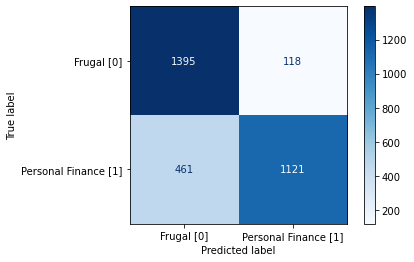

In [36]:
plot_confusion_matrix(boost, X_test, y_test, cmap='Blues',display_labels=['Frugal [0]', 'Personal Finance [1]']);    

This confusion matrix shows predictions of the model vs the test data. You can see that this model has a much higher rate of creating false negatives than the random forest model. It has a lower accuracy score overall than the random forest model, however if the situation called for attempting to reduce false positives this model would be a step in the right direction. Since I am optimizing  for overall accuracy this model is performing slightly worse than the random forest model. 

Looking at the predictions of the boost model to compare its predictions on my friends financial advice. 

In [37]:
friends_boost_preds = boost.predict(X_friends)

In [38]:
boost_friends = friendsdf.copy()

In [39]:
boost_friends['predictions'] = friends_boost_preds

In [40]:
boost_friends['predictions'] = boost_friends['predictions'].map(lambda x: 'Frugal' if x == 0 else "Personal Finance")

In [41]:
pd.set_option('display.max_colwidth',1000)
boost_friends

,text,predictions
Rafa,I recommend you invest in cryptocurrency. To the moon,Frugal
Wil,"Returns on the FBSOX, ROGSX, PRGTX, or the SHGTX mutual funds are all doing really well. I would recommend you invest in those. Or just go with Vanguard, cant go wrong with Vanguard",Frugal
Aaron,Invest in rental property.,Frugal
Wil2,Stop eating out and stop going to bars.,Frugal
Aaron2,Dont buy a brand new car right away.,Frugal
Wil3,"Take 1% of your winnings and blow it on a vacation, gambling, or another frivolous purchase. Get that bug to unnecessarily spend money out of your system so you can be serious with the rest of it.",Frugal
Jen,Save $1000 for an emergency fund. Pay off all debt. Set aside 3-6 months of spending for a fully funded emergency fund. Invest 15% of your household income in your retirement. Save for your childrens college fund. Pay off your mortgage. Build wealth and give all your remaining money to the church of Jesus Christ of latter-Day Saints.,Frugal
Jon,Put all you rmoney in Target gift cards then send them care of Good Investements Inc. to PO Box 123 in Lyons Colorado.,Frugal
Colin,"The first step to winning the lottery is simple, take the lump sum winnings and then convert all of those winning into solid gold coins. Then build a large pool and swim through the coins, all cartoons have told me that this is the peak of wealth.",Frugal
Colin2,"Buy a monkey, the laws dont apply to you now that youre rich. Park wherever you want but make sure its still free parking. Invest the majority of your money in high risk investments and put the rest into a locked safe under your bed.",Frugal


The tendency of this model to predict more false negatives is on display here. You can see that the model only predicted one comment as personal finance compared to the four by the other model. Overall I think the predictions in the first model let more meaningful advice through, while not over filtering. If Mr. Seller decided too much noise was getting through we could consider using this model instead to minimize false positives. 

# conclusions and recommendations: 

After evaluating the models, I recommend using the random forest model to help Ben Seller filter through all the advice that he is getting from his friends and family.

The model scored moderately well on the data provided to it from the selected subreddits. It doesn’t have the ability to detect the meaning behind words, but there does appear to be enough difference in the language of the subreddits for the model to carry merit. It seems to be reasonably effective at parsing through financial suggestions and finding the ones that sound more like legitimate financial advice. I recommend to Mr. Seller to not inform his friends how the model functions, because it does appear to have some weaknesses.

recommend that this model can be used as a preliminary tool for filtering out financial suggestions from Mr. Sellers friends. There are some downsides to the model to consider, so do not use it as the only means of deciding what advice to take. However, it can function well as an early filter. It is concluded that there is a meaningful difference between the language of the selected subreddits, enough to build a model that performs well on several performance metrics. 
